In [24]:
import pandas as pd
import pymc as pm

In [25]:

import numpy as np
import matplotlib.pyplot as plt

# Step 1: 표준 정규 분포로부터 50x2 행렬을 생성
np.random.seed(42)
X = np.random.normal(0, 1, (50, 2))

# Step 2: 주어진 모형에 따라 Y 생성
beta_true = np.array([1, 2])  # 실제 베타 값
sigma_true = 1.5  # 실제 표준 편차
Y = X @ beta_true + np.random.normal(0, sigma_true, 50)

In [26]:
X

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473],
       [-0.46947439,  0.54256004],
       [-0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024],
       [-1.72491783, -0.56228753],
       [-1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ],
       [ 0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259],
       [-1.15099358,  0.37569802],
       [-0.60063869, -0.29169375],
       [-0.60170661,  1.85227818],
       [-0.01349722, -1.05771093],
       [ 0.82254491, -1.22084365],
       [ 0.2088636 , -1.95967012],
       [-1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828],
       [-0.11564828, -0.3011037 ],
       [-1.47852199, -0.71984421],
       [-0.46063877,  1.05712223],
       [ 0.34361829, -1.76304016],
       [ 0.32408397, -0.38508228],
       [-0.676922  ,  0.61167629],
       [ 1.03099952,  0.93128012],
       [-0.83921752,

In [27]:
import pandas as pd
pd.Series(Y)

0    -1.902871
1     3.062780
2    -1.216499
3     1.910666
4     0.373717
5    -0.788801
6    -0.755319
7    -2.587626
8     0.001989
9    -3.844300
10   -1.864061
11   -2.821739
12   -0.232192
13    3.295266
14   -1.472568
15    3.555171
16   -2.180987
17   -3.372159
18   -1.996242
19    0.193436
20    2.267751
21   -2.081937
22   -0.814019
23   -0.449171
24   -2.302176
25    2.839603
26   -0.939374
27    2.044113
28   -1.308165
29    1.527140
30   -3.176487
31   -3.395904
32    1.931550
33    2.645444
34   -2.307740
35    5.762370
36    1.918581
37   -1.459032
38    0.709308
39   -5.729674
40    0.835743
41    2.402068
42   -4.223233
43    1.849855
44    0.886599
45    3.207102
46   -3.212803
47   -5.299823
48    1.601143
49   -0.018584
dtype: float64

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (7 chains in 7 jobs)
NUTS: [sigma2, beta]


Output()

Sampling 7 chains for 1_000 tune and 1_000 draw iterations (7_000 + 7_000 draws total) took 26 seconds.


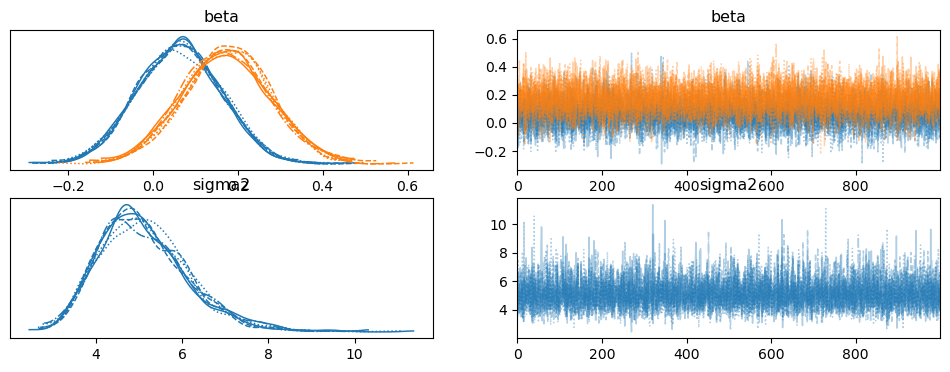

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  0.062  0.098  -0.116    0.247      0.001    0.001   10623.0   
beta[1]  0.174  0.103  -0.011    0.374      0.001    0.001    9193.0   
sigma2   5.115  1.038   3.357    7.059      0.011    0.008    9230.0   

         ess_tail  r_hat  
beta[0]    5391.0    1.0  
beta[1]    6168.0    1.0  
sigma2     5988.0    1.0  


In [28]:

# Step 3: Bayesian 선형 회귀모형 설정
with pm.Model() as model:
    # 사전 분포 설정
    sigma2 = pm.InverseGamma('sigma2', alpha=5, beta=5)
    beta = pm.MvNormal('beta', mu=np.zeros(2), cov=0.01 * np.eye(2), shape=2)
    
    # 우도 함수 설정 (likelihood)
    Y_obs = pm.Normal('Y_obs', mu=pm.math.dot(X, beta), sigma=np.sqrt(sigma2), observed=Y)
    
    # Gibbs 샘플링 실행
    trace = pm.sample(1000, return_inferencedata=True, cores=7)

# Step 4: 결과 시각화
pm.plot_trace(trace)
plt.show()

# 베타 값의 요약 통계량
summary = pm.summary(trace)
print(summary)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (7 chains in 7 jobs)
NUTS: [sigma2, beta]


Output()

Sampling 7 chains for 1_000 tune and 50_000 draw iterations (7_000 + 350_000 draws total) took 82 seconds.


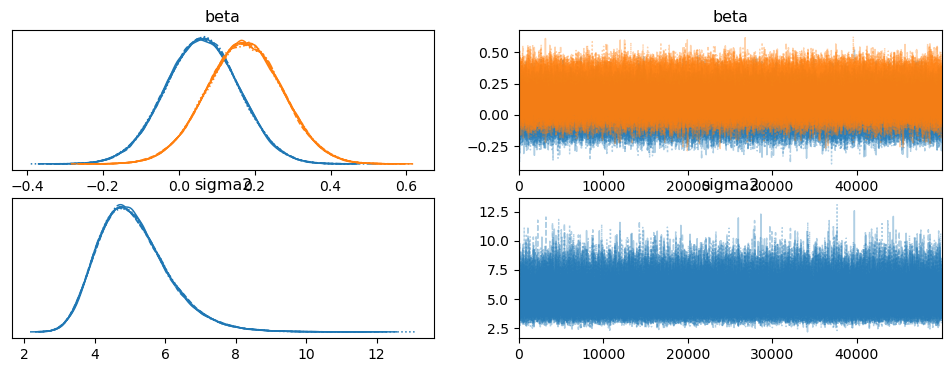

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  0.062  0.097  -0.121    0.244      0.000    0.000  453991.0   
beta[1]  0.173  0.100  -0.015    0.363      0.000    0.000  416048.0   
sigma2   5.116  1.021   3.342    7.035      0.002    0.001  417515.0   

         ess_tail  r_hat  
beta[0]  279739.0    1.0  
beta[1]  285494.0    1.0  
sigma2   280609.0    1.0  


In [29]:

# Step 3: Bayesian 선형 회귀모형 설정
with pm.Model() as model:
    # 사전 분포 설정
    sigma2 = pm.InverseGamma('sigma2', alpha=5, beta=5)
    beta = pm.MvNormal('beta', mu=np.zeros(2), cov=0.01 * np.eye(2), shape=2)
    
    # 우도 함수 설정 (likelihood)
    Y_obs = pm.Normal('Y_obs', mu=pm.math.dot(X, beta), sigma=np.sqrt(sigma2), observed=Y)
    
    # Gibbs 샘플링 실행
    trace = pm.sample(50000, return_inferencedata=True, cores=7)

# Step 4: 결과 시각화
pm.plot_trace(trace)
plt.show()

# 베타 값의 요약 통계량
summary = pm.summary(trace)
print(summary)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (7 chains in 7 jobs)
NUTS: [sigma2, beta]


Output()

Sampling 7 chains for 1_000 tune and 50_000 draw iterations (7_000 + 350_000 draws total) took 98 seconds.


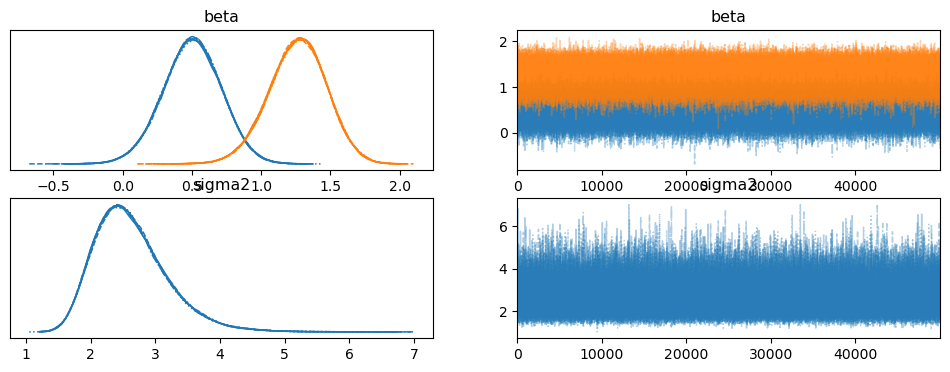

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  0.501  0.209   0.107    0.893      0.000    0.000  391475.0   
beta[1]  1.261  0.209   0.861    1.646      0.000    0.000  262721.0   
sigma2   2.621  0.568   1.652    3.681      0.001    0.001  248669.0   

         ess_tail  r_hat  
beta[0]  270168.0    1.0  
beta[1]  240618.0    1.0  
sigma2   249439.0    1.0  


In [30]:

# Step 3: Bayesian 선형 회귀모형 설정
with pm.Model() as model:
    # 사전 분포 설정
    sigma2 = pm.InverseGamma('sigma2', alpha=5, beta=5)
    beta = pm.MvNormal('beta', mu=np.zeros(2), cov=0.1 * np.eye(2), shape=2)
    
    # 우도 함수 설정 (likelihood)
    Y_obs = pm.Normal('Y_obs', mu=pm.math.dot(X, beta), sigma=np.sqrt(sigma2), observed=Y)
    
    # Gibbs 샘플링 실행
    trace = pm.sample(50000, return_inferencedata=True, cores=7)

# Step 4: 결과 시각화
pm.plot_trace(trace)
plt.show()

# 베타 값의 요약 통계량
summary = pm.summary(trace)
print(summary)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (7 chains in 7 jobs)
NUTS: [sigma2, beta]


Output()

Sampling 7 chains for 1_000 tune and 50_000 draw iterations (7_000 + 350_000 draws total) took 74 seconds.


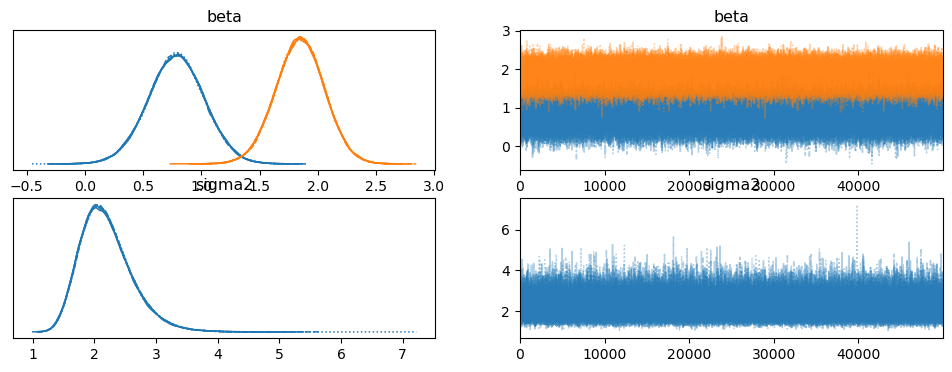

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  0.785  0.242   0.323    1.236      0.000      0.0  472784.0   
beta[1]  1.846  0.210   1.454    2.243      0.000      0.0  505530.0   
sigma2   2.190  0.423   1.457    2.986      0.001      0.0  425113.0   

         ess_tail  r_hat  
beta[0]  272282.0    1.0  
beta[1]  274856.0    1.0  
sigma2   250467.0    1.0  


In [31]:

# Step 3: Bayesian 선형 회귀모형 설정
with pm.Model() as model:
    # 사전 분포 설정
    sigma2 = pm.InverseGamma('sigma2', alpha=5, beta=5)
    beta = pm.MvNormal('beta', mu=np.zeros(2), cov=1 * np.eye(2), shape=2)
    
    # 우도 함수 설정 (likelihood)
    Y_obs = pm.Normal('Y_obs', mu=pm.math.dot(X, beta), sigma=np.sqrt(sigma2), observed=Y)
    
    # Gibbs 샘플링 실행
    trace = pm.sample(50000, return_inferencedata=True, cores=7)

# Step 4: 결과 시각화
pm.plot_trace(trace)
plt.show()

# 베타 값의 요약 통계량
summary = pm.summary(trace)
print(summary)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (7 chains in 7 jobs)
NUTS: [sigma2, beta]


Output()

Sampling 7 chains for 1_000 tune and 50_000 draw iterations (7_000 + 350_000 draws total) took 89 seconds.


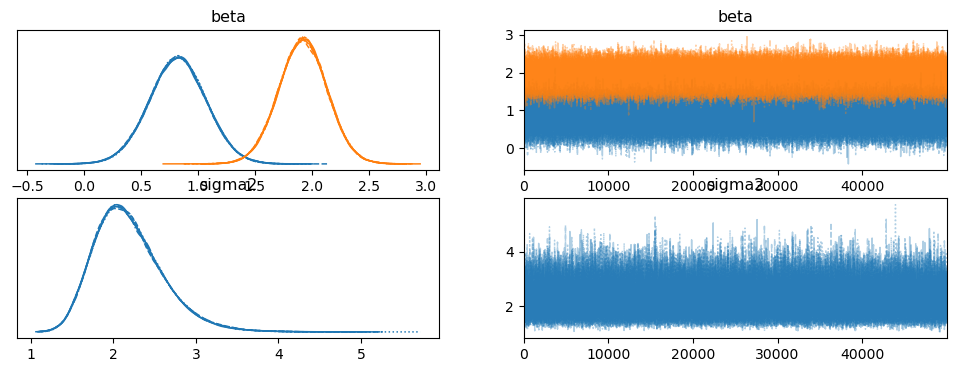

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta[0]  0.823  0.249   0.361    1.300      0.000      0.0  478074.0   
beta[1]  1.920  0.214   1.515    2.320      0.000      0.0  467937.0   
sigma2   2.187  0.421   1.459    2.979      0.001      0.0  448325.0   

         ess_tail  r_hat  
beta[0]  273346.0    1.0  
beta[1]  272977.0    1.0  
sigma2   256875.0    1.0  


In [32]:

# Step 3: Bayesian 선형 회귀모형 설정
with pm.Model() as model:
    # 사전 분포 설정
    sigma2 = pm.InverseGamma('sigma2', alpha=5, beta=5)
    beta = pm.MvNormal('beta', mu=np.zeros(2), cov=10 * np.eye(2), shape=2)
    
    # 우도 함수 설정 (likelihood)
    Y_obs = pm.Normal('Y_obs', mu=pm.math.dot(X, beta), sigma=np.sqrt(sigma2), observed=Y)
    
    # Gibbs 샘플링 실행
    trace = pm.sample(50000, return_inferencedata=True, cores=7)

# Step 4: 결과 시각화
pm.plot_trace(trace)
plt.show()

# 베타 값의 요약 통계량
summary = pm.summary(trace)
print(summary)
